In [1]:
%%HTML
<script>
    var code_show=true; //true -> hide code at first

    function code_toggle() {
        $('div.prompt').hide(); // always hide prompt

        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>

<a href="javascript:code_toggle()">[Toggle Code]</a>

# Statistics: Speed Difference C vs Python #
## A very simple , non trivial Comparison using simple function execution

1. C code and Python 3 script were created that replaces an integer value about 100,000 times.
2. These codes were executed on the same machine .
3. The speed of these executions were recorded about 500 times.



4. I made the code similar as much as I can
5. We can argue that there can be a better implementation and I agree.
6. You can replicate the result by downloading the source code in the link provided below


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

#for displaying images
from IPython import display 

In [3]:
c_data = pd.read_csv("c.csv")
py_data = pd.read_csv("py.csv")
optim_c = pd.read_csv("c2.csv")
mydata = np.c_[c_data.values, py_data.values, optim_c.values]
mydata = pd.DataFrame(mydata, columns = ['C', 'PYTHON', 'OPTIM_C'])

## C CODE:

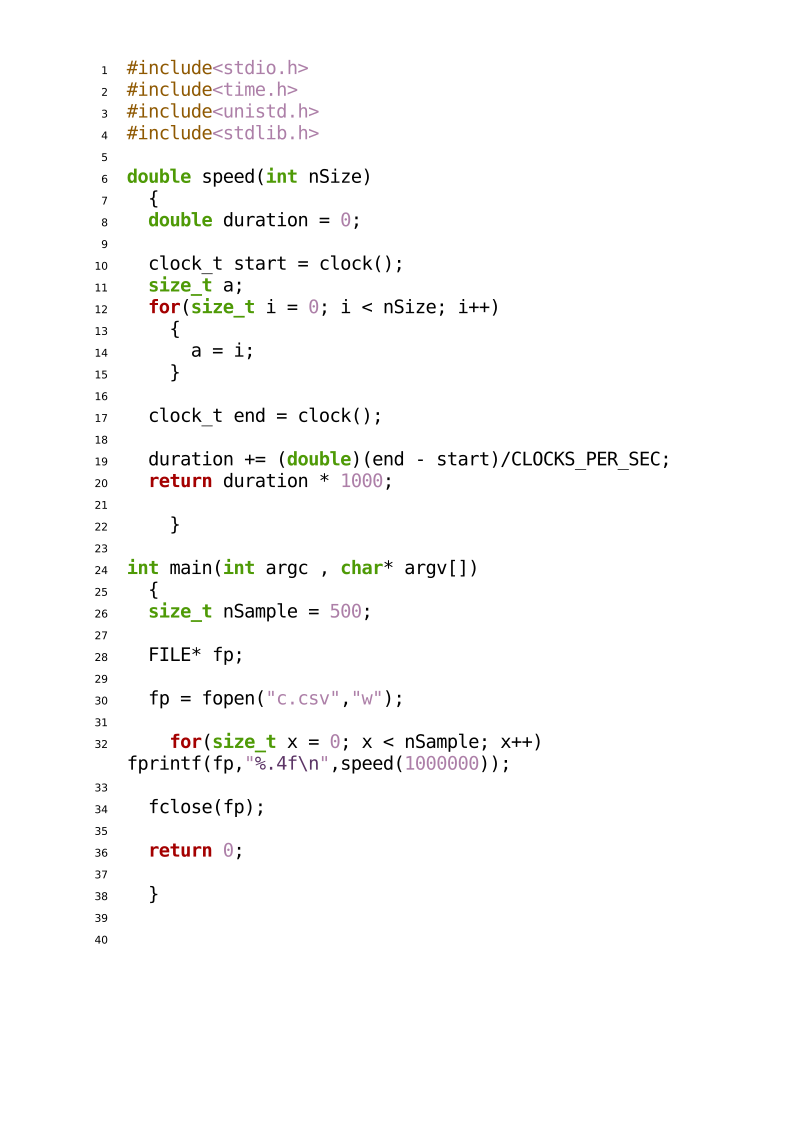

In [4]:
display.Image("c.png")

## Python Code

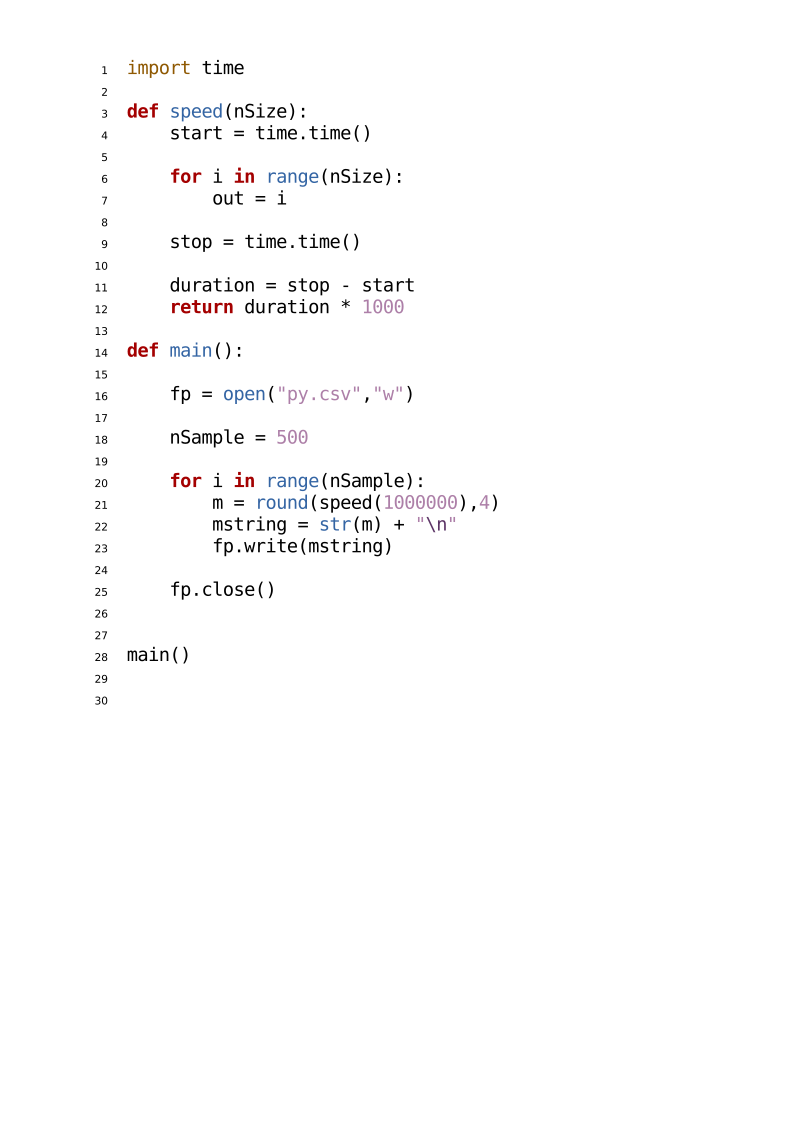

In [5]:
display.Image("py.png")

# Speed Execution Comparison
1. Bootstrap mean statistics were obtained 
2. The difference is then compared

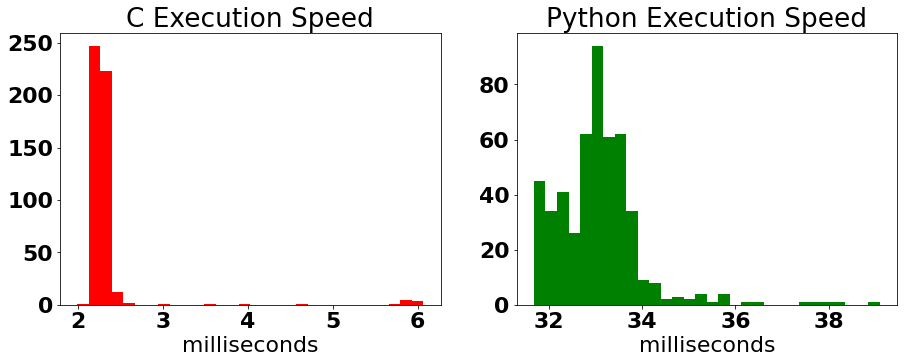

In [6]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax1.title.set_text("C Execution Speed")
ax1.hist(mydata['C'], bins = 30, color = 'r')
ax1.set_xlabel("milliseconds")
ax2 = fig.add_subplot(1,2,2)
ax2.title.set_text("Python Execution Speed")
ax2.hist(mydata['PYTHON'], bins = 30, color = 'g')
ax2.set_xlabel("milliseconds")

plt.show()

In [7]:
size = 500
result1 = np.empty(shape = size, dtype = float)
result2 = np.empty(shape = size, dtype = float)

#bootstrap : 

def bootStrap(sample):
    z = np.random.choice(sample, sample.shape[0])
    return z

def getMeanBootStrap(size, sampleData1, sampleData2):
    for i in range(size):
        result1[i] = np.mean(bootStrap(sampleData1))
        result2[i] = np.mean(bootStrap(sampleData2))
    result3 = result1 - result2
    return result3

def getMultiplierBootStrap(size, sampleData1, sampleData2):
    for i in range(size):
        result1[i] = np.mean(bootStrap(sampleData1))
        result2[i] = np.mean(bootStrap(sampleData2))
    result3 = result1 / result2
    return result3

## Range of Mean Difference between sample Means

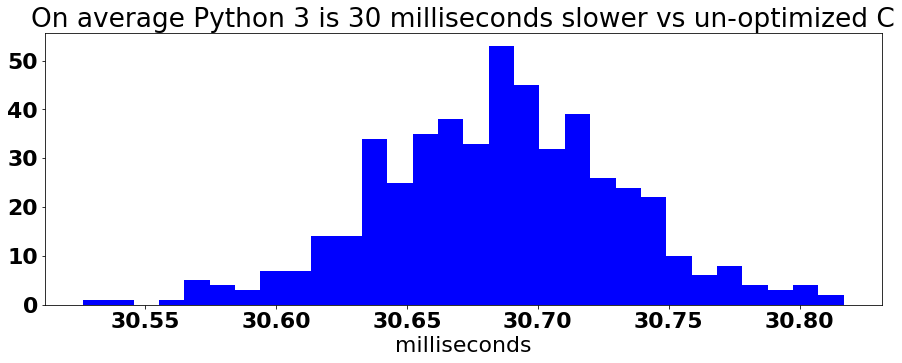

In [8]:
difference = getMeanBootStrap(size, mydata['PYTHON'], mydata['C'] )

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,1,1)
plt.title("On average Python 3 is 30 milliseconds slower vs un-optimized C")

ax.hist(difference, bins = 30, color = 'b')
ax.set_xlabel("milliseconds")
plt.show()

## Range of Mean Speed comparison between sample means

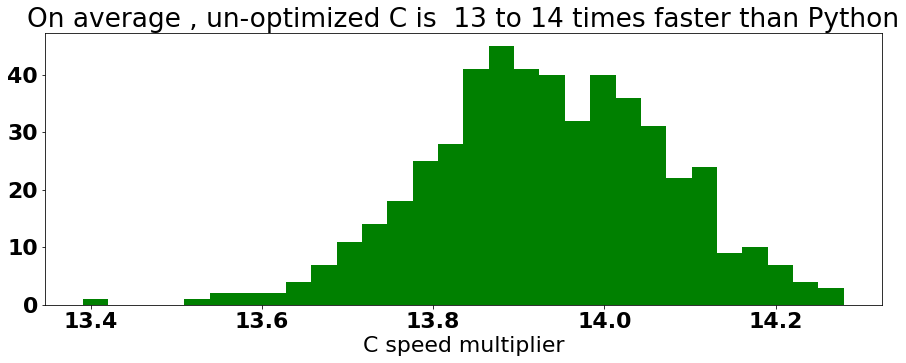

In [9]:
multiplier = getMultiplierBootStrap(size, mydata['PYTHON'], mydata['C'] )

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,1,1)
ax.title.set_text("On average , un-optimized C is  13 to 14 times faster than Python")
ax.hist(multiplier, bins = 30, color = 'g')
ax.set_xlabel("C speed multiplier")
plt.show()

# How about an optimized c code? 

## Compile c code with flags -O3 :
gcc -O3 -o main main.c

## The result:
## Range of Mean Speed comparison between sample means

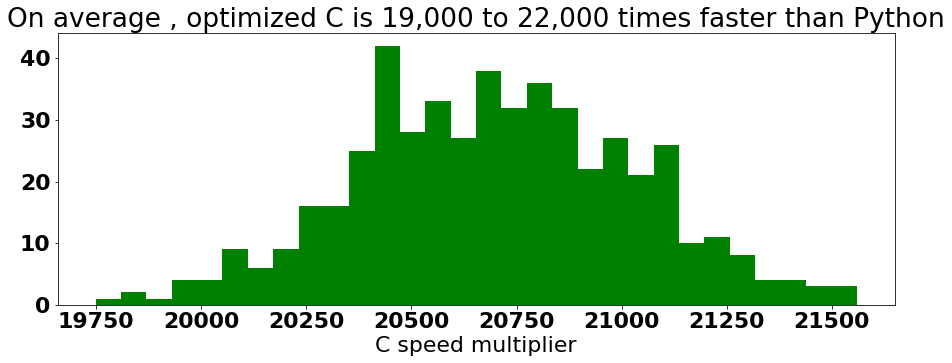

In [10]:


optimized = getMultiplierBootStrap(size, mydata['PYTHON'], mydata['OPTIM_C']  )
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,1,1)
ax.title.set_text("On average , optimized C is 19,000 to 22,000 times faster than Python")
ax.hist(optimized, bins = 30, color = 'g')
ax.set_xlabel("C speed multiplier")
plt.show()

# Now we know :-)

# Thanks for watching !!!